<div style="text-align: center; background-color: #750E21; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  PROJECT: ... 📌
</div>

<div style="text-align: center; background-color: #0766AD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 2 - Exploratory Data Analysis 📌
</div>

## **IMPORT LIBRARY** 🎄

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **EXPLORING DATA** 📝

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
  BƯỚC 1: Đọc dữ liệu đã được tiền xử lý 🔥
</div>

In [3]:
df = pd.read_csv('../../Data/2425_QC_cleaned.csv')
df.head(10)

,Ad Topic Line,Area Income,Male,Age,Daily Time Spent on Site,Daily Internet Usage,City,Country,Clicked on Ad,Timestamp
0,Cloned 5thgeneration orchestration,61833.90,0,35,68.95,256.09,Wrightburgh,Tunisia,0,2016-03-27 00:53:00
1,Monitored national standardization,68441.85,1,31,80.23,193.77,West Jodi,Nauru,0,2016-04-04 01:39:00
2,Organic bottom-line service-desk,59785.94,0,26,69.47,236.50,Davidton,San Marino,0,2016-03-13 20:35:00
3,Triple-buffered reciprocal time-frame,54806.18,1,29,74.15,245.89,West Terrifurt,Italy,0,2016-10-01 02:31:00
4,Robust logistical utilization,73889.99,0,35,68.37,225.58,South Manuel,Iceland,0,2016-03-06 03:36:00
5,Sharable client-driven software,59761.56,1,23,59.99,226.74,Jamieberg,Norway,0,2016-05-19 14:30:00
6,Enhanced dedicated support,53852.85,0,33,88.91,208.36,Brandonstad,Myanmar,0,2016-01-28 20:59:00
7,Reactive local challenge,24593.33,1,48,66.00,131.76,Port Jefferybury,Australia,1,2016-07-03 01:40:00
8,Configurable coherent function,68862.00,1,30,74.53,221.51,West Colin,Grenada,0,2016-04-18 09:33:00
9,Mandatory homogeneous architecture,55642.32,1,20,69.88,183.82,Ramirezton,Ghana,0,2016-11-07 01:42:00


<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
  BƯỚC 2: Phân tích các cột dữ liệu số sử dụng Descriptive Statistics 🔥
</div>

Descriptive Statistics cho thấy các đặc điểm của các cột dữ liệu số. Nó cho chúng ta thấy những thông tin như:
- Mean (Giá trị trung bình)
- Median (Giá trị trung vị)
- Mode (Giá trị yếu vị)
- Quantiles (Các phân vị): Quartiles (Tứ phân vị)
- Range và IQR (Interquartile Range)
- Variance (Phương sai) và Standard deviation (Độ lệch chuẩn)
- Coefficient of Variation (Hệ số biến thiên)
- Skewness (Độ lệch)
- Standard Error (Sai số chuẩn)
- Correlation (Hệ số tương quan)

In [4]:
numerical_columns = ['Area Income',	'Age', 'Daily Time Spent on Site', 'Daily Internet Usage']
df_copy = df[numerical_columns].copy()
df_copy.describe()

,Area Income,Age,Daily Time Spent on Site,Daily Internet Usage
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,55025.321364,36.018000,65.000200,180.000100
std,13343.228619,8.779907,15.853615,43.902339
min,19373.553750,19.000000,32.600000,104.780000
25%,47031.802500,29.000000,51.360000,138.830000
50%,57012.300000,35.000000,68.215000,183.130000
75%,65470.635000,42.000000,78.547500,218.792500
max,79484.800000,61.000000,91.430000,269.960000


📊 `Trực quan hoá phân phối`

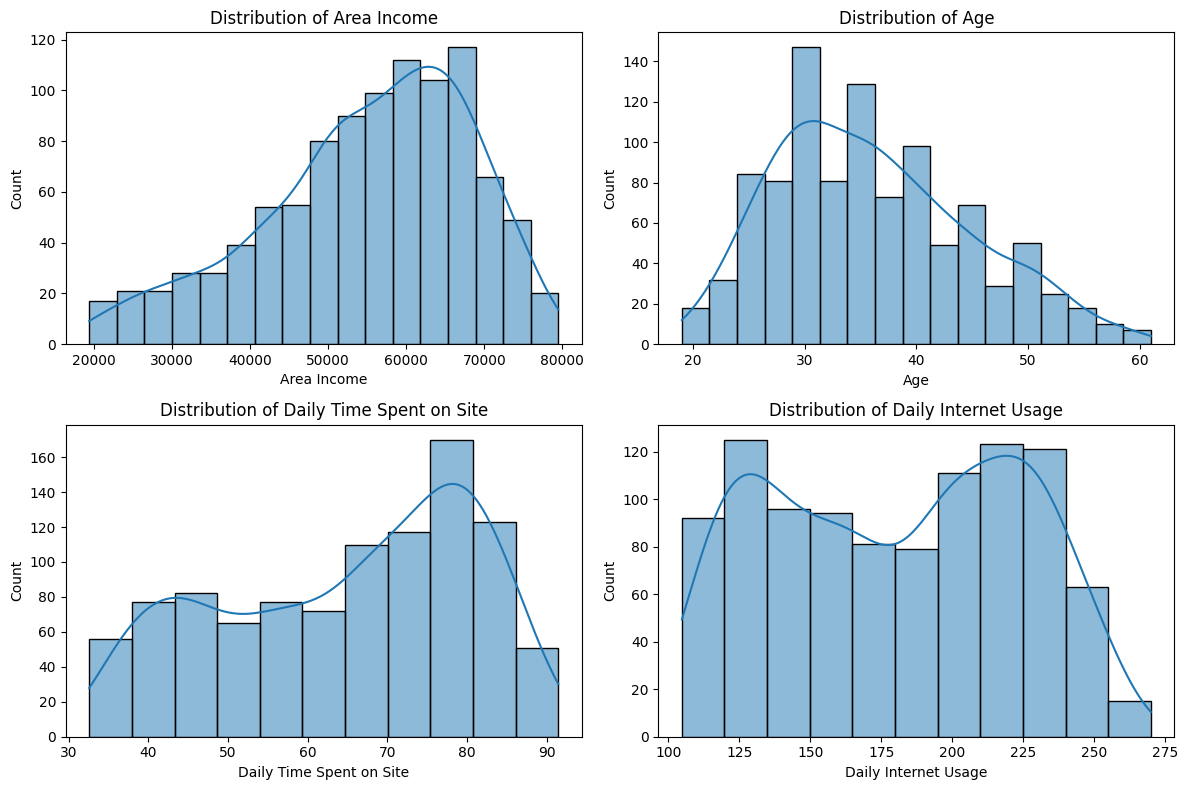

In [5]:
# Create subplots - 2 rows, 2 columns for 4 features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Adjusting the figure size and grid layout

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each numerical feature in a separate subplot
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])  # Plot histogram and KDE in the i-th subplot
    axes[i].set_title(f'Distribution of {col}')  # Set title for each subplot

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plot
plt.show()


📏 `Tính toán độ lệch (skewness)`

In [6]:
skewness = df[numerical_columns].skew()
skewness

Area Income                -0.620982
Age                         0.478471
Daily Time Spent on Site   -0.371760
Daily Internet Usage       -0.033537
dtype: float64

📈`NHẬN XÉT:`
- Dựa vào kết quả phân tích ở trên, chúng ta có thể thấy rẳng các giá trị `Daily Time Spent on Site`, `Area Income`, `Age`, có xu hướng phân bố không đồng đều, một ví dụ điển hình là có đuôi dài hơ.

- Trong khi đó, giá trị `Daily Internet Usage` được phân bố khá đồng đều và chỉ lõm ở một phần nhỏ ở giữa biểu đồ. 

- Ngoài ra, kết quả tính toán độ lệch (skewness) cũng cho thấy `Daily Internet Usage` có giá trị độ lệch gần nhất với 0, trong khi `Daily Time Spent on Site`, `Age` và `Area Income` rất xa 0.

### **Quan sát** 💬

Mọi số liệu thống kê đều ổn định và không gặp bất cứ vấn đề gì.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
BƯỚC 3: Phân tích đơn biến trong các cột dữ liệu số 🔥
</div>

## **Question 1** 🔔

❓  **Câu hỏi đề ra:** Phân bố về thu nhập tập trung ở (những) khoảng nào? (Các) giá trị đó có lệch khỏi giá trị trung bình hay không? Có tồn tại nhiều giá trị ở mức min và max hay không? 

✅  **Mục đích của việc trả lời câu hỏi** Xác định (những) khoảng thu nhập của thống kê, từ đó có thể tập trung phân tích những khoảng thu nhập nhất định sẽ có phản hồi như thế nào về việc xem quảng cáo.

💡  **Cách để tìm ra câu trả lời**: Lập bảng tần suất, tính toán các giá trị thống kê như độ lệch, độ nhọn, cũng như vẽ các biểu đồ tần suất và biểu đồ hộp để xác định.

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: Lập bảng tần suất

In [7]:
pd.cut(df["Area Income"], bins=15).value_counts(sort=False)

Area Income
(19313.443, 23380.97]      17
(23380.97, 27388.387]      25
(27388.387, 31395.803]     28
(31395.803, 35403.219]     33
(35403.219, 39410.636]     35
(39410.636, 43418.052]     59
(43418.052, 47425.469]     62
(47425.469, 51432.885]     89
(51432.885, 55440.302]    107
(55440.302, 59447.718]    110
(59447.718, 63455.134]    132
(63455.134, 67462.551]    130
(67462.551, 71469.967]     90
(71469.967, 75477.384]     56
(75477.384, 79484.8]       27
Name: count, dtype: int64

**Bước 2**: Vẽ biểu đồ hộp (Boxplot) và biểu đồ tần suất(histogram)

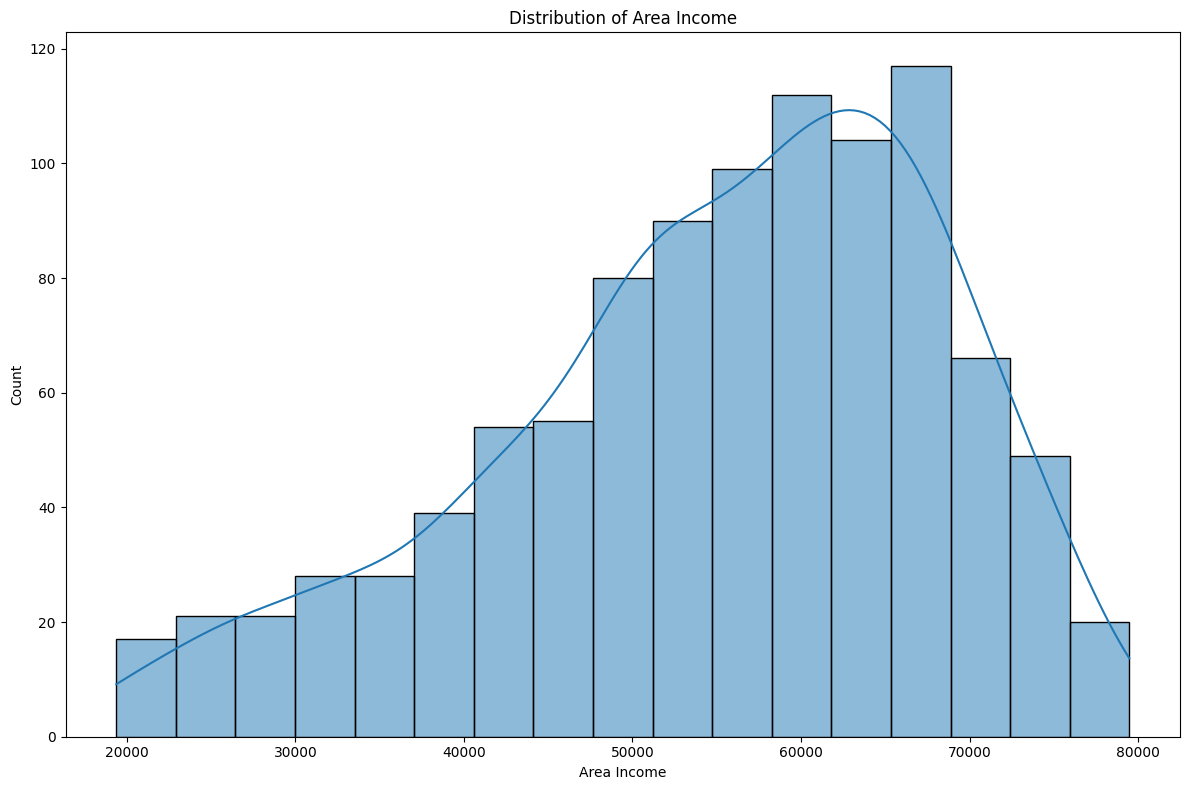

In [8]:
plt.subplots(1,1, figsize=(12, 8))
sns.histplot(df['Area Income'], kde=True)
plt.title(f'Distribution of Area Income') 
plt.tight_layout()
plt.show()

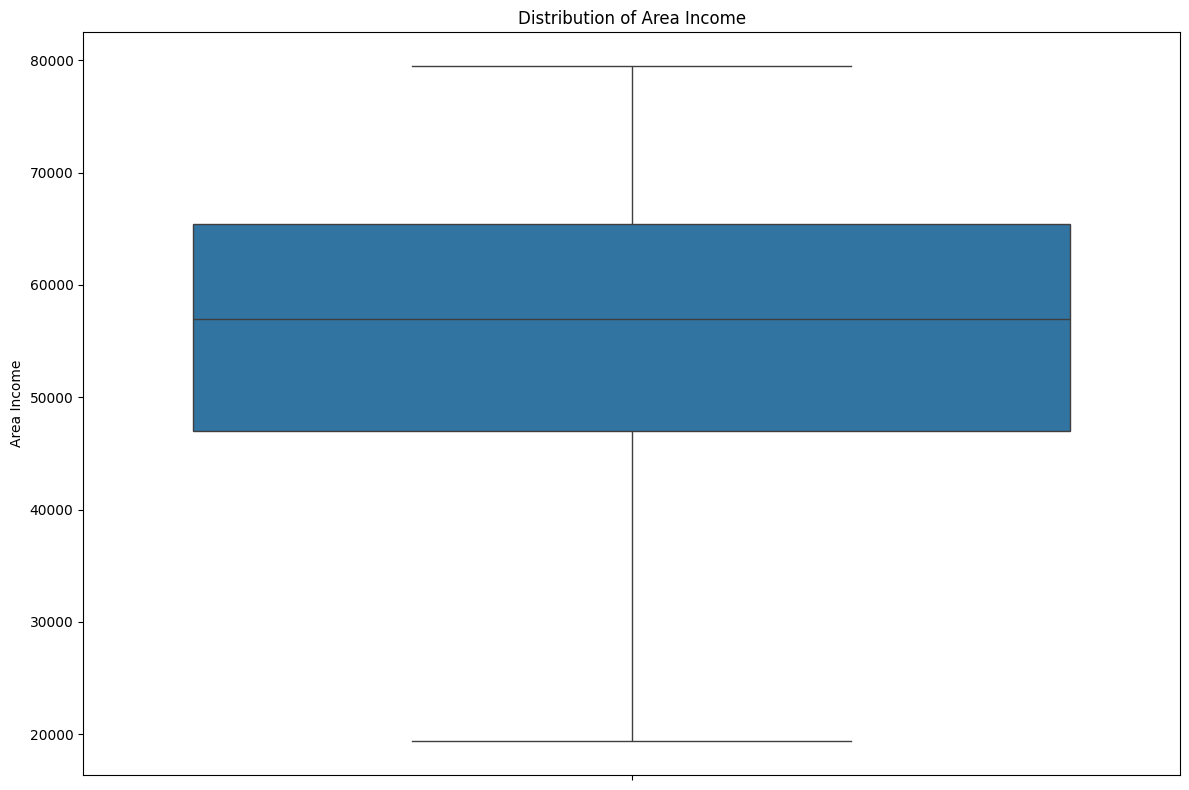

In [9]:
plt.subplots(1,1, figsize=(12, 8))
sns.boxplot(df['Area Income'])
plt.title(f'Distribution of Area Income') 
plt.tight_layout()
plt.show()

**Bước 3**: Tính toán độ nhọn(kurtosis) và độ lệch(skewness)

In [10]:
print("Độ nhọn: "+str(df['Area Income'].kurt()))
print("Độ lệch: "+str(df['Area Income'].skew()))

Độ nhọn: -0.20514290621010733
Độ lệch: -0.6209817334744657


### **Quan sát** 💬
- Từ bảng tần suất và 2 biểu đồ có thể thấy được giá trị của Area Income có giá trị từ gần 20000 đến dưới 80000 và tập trung vào khoảng từ 50000 đến dưới 70000.
- Độ lệch nhỏ hơn 0 nên có thể nhận xét rằng nhiều người có thu nhập cao hơn trung bình, nhưng lại có ít người có thu nhập cao.
- Độ nhọn nhỏ hơn 0 cho thấy thống kê có ít giá trị tập trung ở trung bình hơn so với phân phối chuẩn, đồng thời có xu hướng ít xuất hiện giá trị outliers hơn.

## **Question 2** 🔔

❓  **Câu hỏi đề ra:** Phân tích đơn biến Gender (cột Male)

✅  **Mục đích của việc trả lời câu hỏi** So sánh tỉ lệ số lượng giữa nam và nữ

💡  **Cách để tìm ra câu trả lời**: Sử dụng hàm value_counts() của thư viện pandas và sử dụng countplot của seaborn để trực quan hóa dữ liệu

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: Sử dụng hàm value_counts() của pandas

In [7]:
df["Male"].value_counts()

Male
0    519
1    481
Name: count, dtype: int64

**Bước 2**: Sử dụng countplot của seaborn

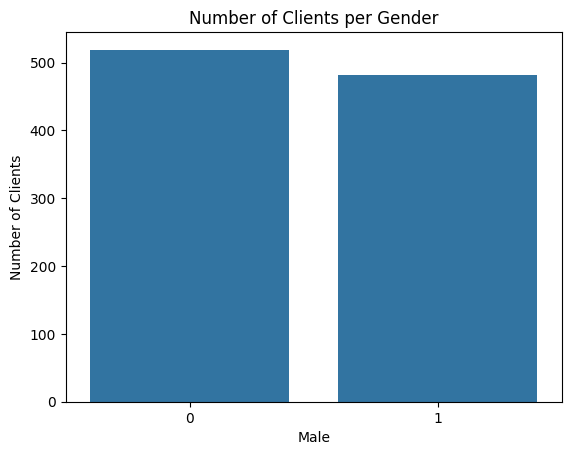

In [8]:
sns.countplot(data=df,x="Male")
plt.title("Number of Clients per Gender")
plt.ylabel("Number of Clients")
plt.show()

### **Quan sát** 💬
- Số lượng nam và nữ xấp xỉ tương đương với nhau

## **Question 3** 🔔

❓  **Câu hỏi đề ra:** Phân tích đơn biến Age

✅  **Mục đích của việc trả lời câu hỏi** Nhằm phân tích lượng người dùng theo từng độ tuổi;

💡  **Cách để tìm ra câu trả lời**: Sử dụng hàm describe() và sử dụng historgram

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: Sử dụng hàm describe()

In [9]:
df["Age"].describe()

count    1000.000000
mean       36.018000
std         8.779907
min        19.000000
25%        29.000000
50%        35.000000
75%        42.000000
max        61.000000
Name: Age, dtype: float64

**Bước 2**: Sử dụng histogram

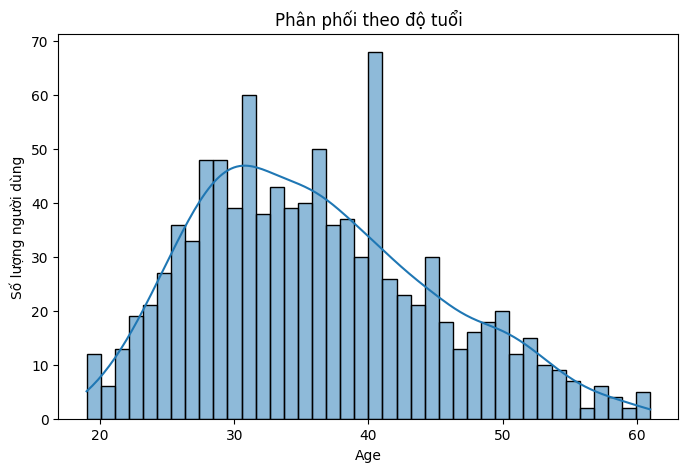

In [10]:
plt.figure(figsize=[8,5])
sns.histplot(data=df,x="Age",bins=40, kde=True).set(title="Phân phối theo độ tuổi",ylabel="Số lượng người dùng")
plt.show()

### **Quan sát** 💬
- Độ tuổi trung bình trong mẫu quan sát là 36.
- Dựa theo biểu đồ histogram, cột "Age" không theo phân phối chuẩn do bị lệch phải.
- Biểu đồ cho thấy một số nhóm tuổi phổ biến, đặc biệt là từ 30 đến 40 tuổi.

## **Question 4** 🔔

❓  **Câu hỏi đề ra:** Thời gian người dùng trên website tập trung vào khoảng nào? Có gần khoảng trung bình hay không?

✅  **Mục đích của việc trả lời câu hỏi** Xác định thời gian người dùng thường bỏ ra khi dùng website để thiết kế nội dung phù hợp với thời gian, đồng thời phát hiện những vấn đề trong thiết kế website khi thấy thời gian người dùng trên website quá ít.

💡  **Cách để tìm ra câu trả lời**: Lập bảng tần suất, tính toán độ lệch, độ nhọn của phân phối và vẽ biểu đồ để nhận xét.

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: Lập bảng thống kê

In [11]:
pd.cut(df["Daily Time Spent on Site"], bins=11).value_counts(sort=False)

Daily Time Spent on Site
(32.541, 37.948]     56
(37.948, 43.296]     77
(43.296, 48.645]     82
(48.645, 53.993]     65
(53.993, 59.341]     77
(59.341, 64.689]     72
(64.689, 70.037]    110
(70.037, 75.385]    117
(75.385, 80.734]    170
(80.734, 86.082]    123
(86.082, 91.43]      51
Name: count, dtype: int64

**Bước 2**: Tính toán độ nhọn, độ lệch

In [12]:
print("Độ nhọn: "+str(df["Daily Time Spent on Site"].kurt()))
print("Độ lệch: "+str(df["Daily Time Spent on Site"].skew()))

Độ nhọn: -1.0955338459580628
Độ lệch: -0.37176048811269113


**Bước 3**: Vẽ biểu đồ

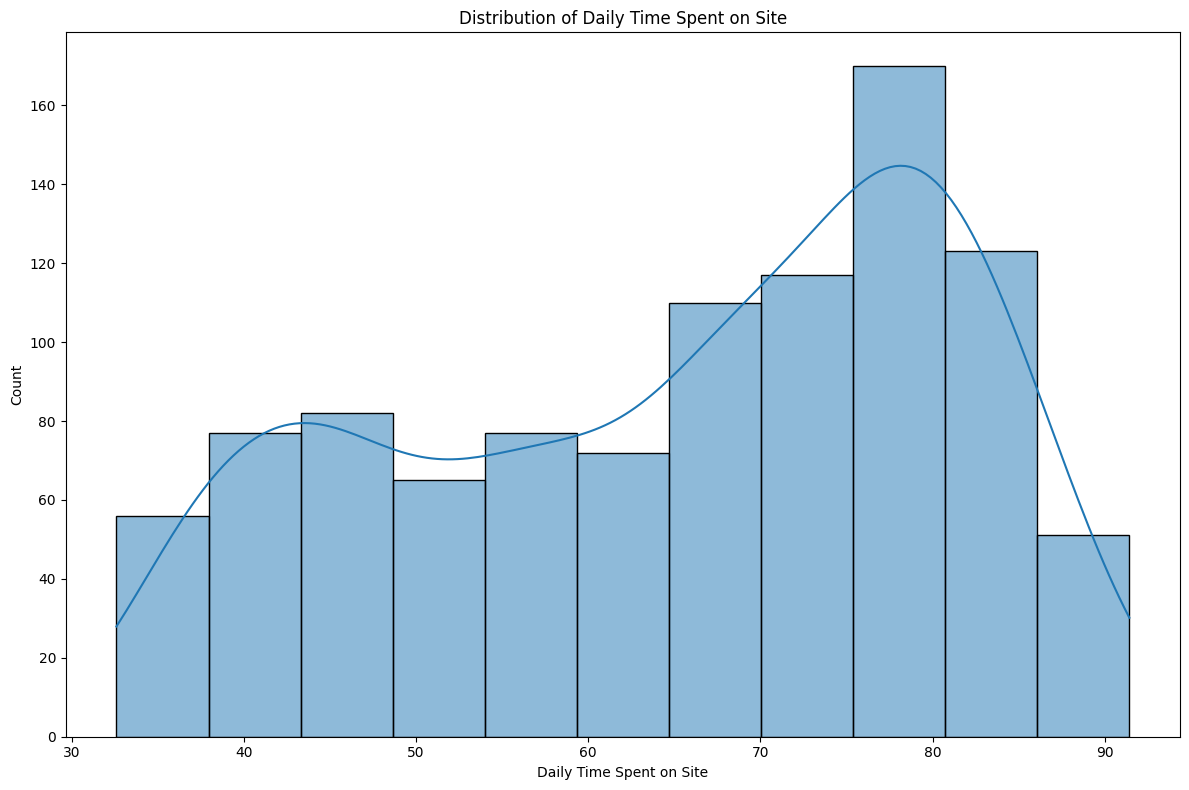

In [13]:
plt.subplots(1,1, figsize=(12, 8))
sns.histplot(df['Daily Time Spent on Site'], kde=True)
plt.title(f'Distribution of Daily Time Spent on Site') 
plt.tight_layout()
plt.show()

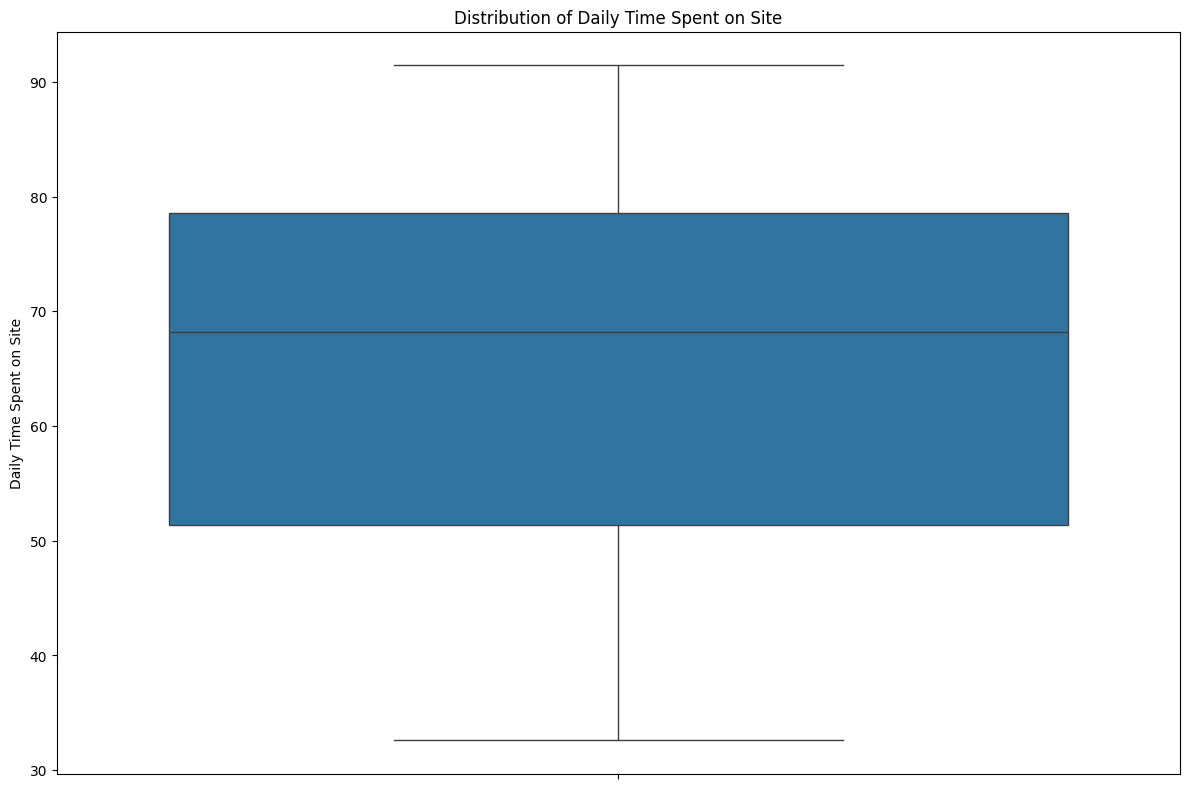

In [14]:
plt.subplots(1,1, figsize=(12, 8))
sns.boxplot(df['Daily Time Spent on Site'])
plt.title(f'Distribution of Daily Time Spent on Site') 
plt.tight_layout()
plt.show()

### **Quan sát** 💬
- Thời gian người dùng sử dụng website từ 30 đến 90 phút, tập trung nhiều vào khoảng từ 65 đến 85 phút, cao nhất là vào khoảng 75-80 phút.
- Có độ nhọn -1.09, cho thấy có ít sự xuất hiện của các giá trị gần cực đại và cực tiểu.
- Độ lệch -0.37 nên thấy được đồ thị tần suất bị lệch sang trái.

## **Question 5** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 6** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
BƯỚC 4: Mô tả mối tương quan giữa các cột trong tập dữ liệu 🔥
</div>

Bây giờ chúng ta sẽ xem xét các cột dữ liệu có sẵn trong tập dữ liệu để xác định và phân tích mối quan hệ giữa chúng. Sau đó là xác định những cột dữ liệu nào trong tập dữ liệu đóng góp đáng kể cho mục tiêu của chúng ta.  

Bằng cách tính toán và trực quan hóa, Python cho phép chúng ta tạo ma trận tương quan, đây là bảng biểu thị các hệ số tương quan giữa các biến khác nhau.

### **Ma trận tương quan**

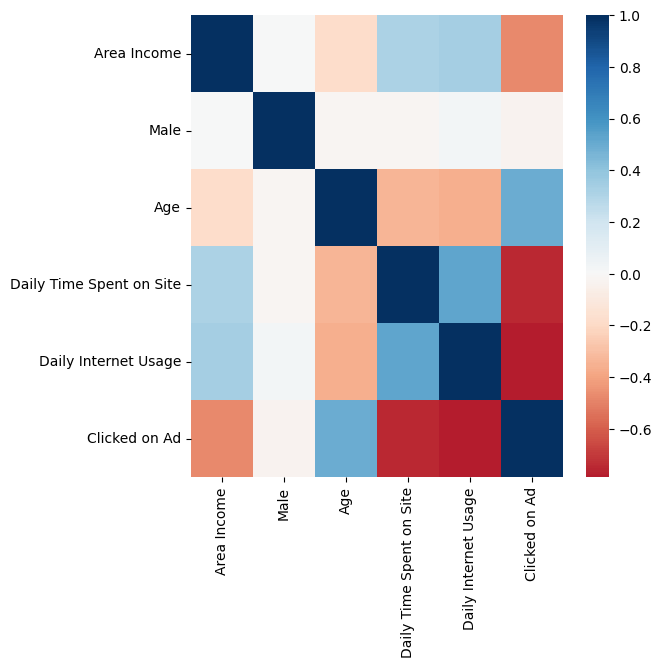

In [15]:
df_copy = df.select_dtypes(include='number')
# Plot a correlation matrix
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(df_copy.corr(), cmap='RdBu', center=0,ax=ax)
plt.show()

### **Bảng hệ số tương quan**

In [16]:
df_copy.corr()

,Area Income,Male,Age,Daily Time Spent on Site,Daily Internet Usage,Clicked on Ad
Area Income,1.000000,0.002524,-0.184454,0.312198,0.339280,-0.476905
Male,0.002524,1.000000,-0.022045,-0.018951,0.028012,-0.038027
Age,-0.184454,-0.022045,1.000000,-0.333021,-0.367484,0.493874
Daily Time Spent on Site,0.312198,-0.018951,-0.333021,1.000000,0.518658,-0.748117
Daily Internet Usage,0.339280,0.028012,-0.367484,0.518658,1.000000,-0.786539
Clicked on Ad,-0.476905,-0.038027,0.493874,-0.748117,-0.786539,1.000000


### **Quan sát** 💬
- Có một vài cột dữ liệu có mỗi tương quan khá mạnh với những cột khác, điển hình như là `Clicked on Ad`, Daily `Time Spent on Site`, `Daily Internet Usage`.
- Các cột khác như `Clicked on Ad`, `Area Income`, `Age`, có hệ số tương quan ở mức vừa phải.
- Còn lại các cột khác thì có hệ số tương quan khá yếu.

there are some features that seem to have strong correlation with each other, namely `Like`, `View`, `Charted-duration`, `Most view per day`. Other features, in constrast, correlate quite weak.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
BƯỚC 5: Phân tích hai biến trong tập dữ liệu 🔥
</div>

## **Question 1** 🔔

❓  **Câu hỏi đề ra:** Phân tích 2 biến Area Income và Clicked on Ad

✅  **Mục đích của việc trả lời câu hỏi** Phân tích sự tương quan giữa thu nhập với khả năng nhấp vào quảng cáo

💡  **Cách để tìm ra câu trả lời**: Sử dụng heatmap để so sánh sự tương quan và boxplot để trực quan độ thu nhập và khả năng nhấp vào quảng cáo

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: Sử dụng heatmap để tìm sự tương quan của 2 cột Area Income và Clicked on Ad

               Area Income  Clicked on Ad
Area Income       1.000000      -0.476905
Clicked on Ad    -0.476905       1.000000


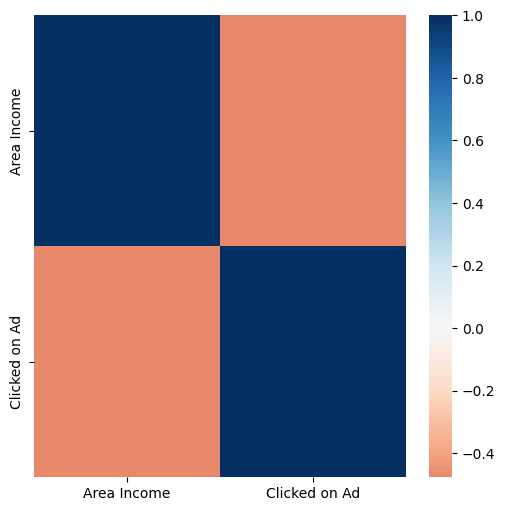

In [13]:
df_tmp = df[["Area Income","Clicked on Ad"]].corr()
print(df_tmp)
# Plot a correlation matrix
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(df_tmp, cmap='RdBu', center=0,ax=ax)
plt.show()

**Bước 2**: Sử dụng bloxplot

<Axes: xlabel='Clicked on Ad', ylabel='Area Income'>

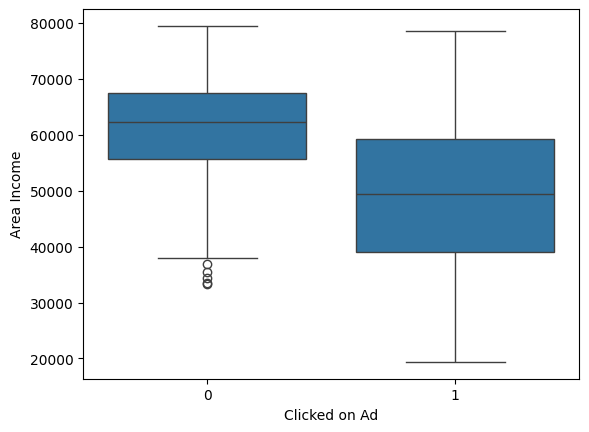

In [14]:
sns.boxplot(data=df, x="Clicked on Ad", y="Area Income")


### **Quan sát** 💬
- Khi quan sát độ tương quan giữa 2 cột Area Income và Clicked on Ad thì ta có thể thấy chúng có độ tương quan trung bình, nghĩa là thu nhập không hẳn là yếu tố chính để xác định xem người dùng có nhấp vào quảng cáo hay không.
- Khi quan sát boxplot, ta có thể thấy những người không nhấp vào quảng cáo, mức thu nhập trung bình của khu vực cao hơn so với những người nhấp vào quảng cáo.
- Nhóm không nhấp vào quảng cáo có khoảng thu nhập hẹp hơn (phần giữa của hộp nhỏ hơn), cho thấy sự tập trung của thu nhập trong khoảng 55,000 đến 70,000.
- Nhóm nhấp vào quảng cáo có phân phối rộng hơn, với một khoảng biến động thu nhập lớn hơn, trải từ khoảng 20,000 đến gần 80,000.
- Vì vậy ta có thể thấy rằng những người có mức thu nhập cao sẽ có ít khả năng nhấp vào quảng cáo hơn.

## **Question 2** 🔔

❓  **Câu hỏi đề ra:** Phân tích 2 biến Gender (cột Male) và Clicked on Ad

✅  **Mục đích của việc trả lời câu hỏi** Phân tích khả năng nhấp vào quảng cáo đối với mỗi giới tính 

💡  **Cách để tìm ra câu trả lời**: Sử dụng heatmap để so sánh sự tương quan và barplot để trực quan độ thu nhập và khả năng nhấp vào quảng cáo

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: Sử dụng heatmap để tìm sự tương quan của 2 cột Male và Clicked on Ad

                   Male  Clicked on Ad
Male           1.000000      -0.038027
Clicked on Ad -0.038027       1.000000


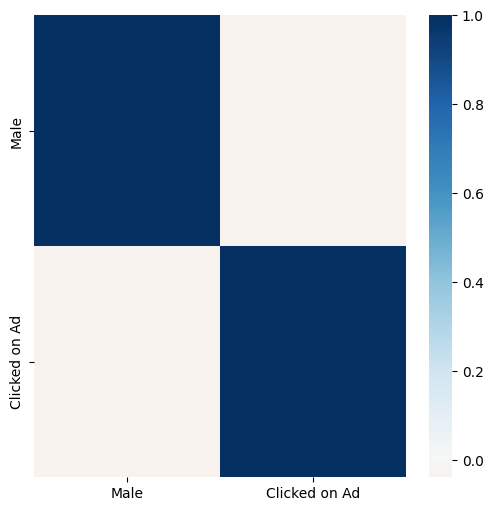

In [15]:
df_tmp = df[["Male","Clicked on Ad"]].corr()
print(df_tmp)
# Plot a correlation matrix
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(df_tmp, cmap='RdBu', center=0,ax=ax)
plt.show()

**Bước 2**: Sử dụng barplot

<Axes: xlabel='Male', ylabel='count'>

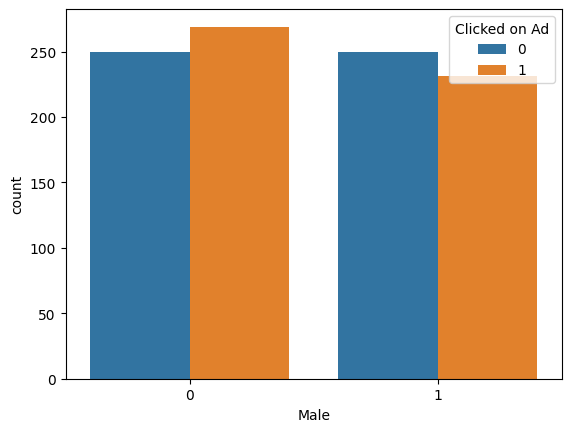

In [16]:
sns.countplot(data=df, x="Male", hue="Clicked on Ad")
# pd.crosstab(df['Male'], df['Clicked on Ad']).plot(kind='bar', stacked=True)


### **Quan sát** 💬
- Quan sát độ tương quan giữa cột Male và Clicked on Ad, ta có thể thấy sự tương quan giữa chúng gần như bằng 0. Điều đó có nghĩa là giới tính không quyết định khả năng nhấp vào quảng cáo.
- Khi nhìn vào barplot, ta cũng có thể thấy số lượng giữa việc nhấp và không nhấp vào quảng cáo đối với nam và nữ xấp xỉ không khác nhau.
=> Giới tính không quyết định khả năng nhấp vào quảng cáo

## **Question 3** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 4** 🔔

❓  **Câu hỏi đề ra:** Người dùng dành nhiều thời gian trên website có hay nhấn vào quảng cáo hay không?

✅  **Mục đích của việc trả lời câu hỏi** Xác định người dùng khi sử dụng trang web nhiều thì có nhấn vào quảng cáo hay không, từ đó chỉnh sửa nội dung và giao diện website, quảng cảo cho phù hợp.

💡  **Cách để tìm ra câu trả lời**: Tính hệ số tương quan và lập biểu đồ.

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: Tính hệ số tương quan

In [17]:
df[['Daily Time Spent on Site','Clicked on Ad']].corr()

,Daily Time Spent on Site,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.748117
Clicked on Ad,-0.748117,1.000000


**Bước 2**: Lập biểu đồ

In [18]:
dfDailyClicked=df[['Daily Time Spent on Site','Clicked on Ad']]
#gom nhóm
groups=dfDailyClicked.groupby(['Clicked on Ad', pd.cut(df["Daily Time Spent on Site"], bins=11)],observed=False)
dfDailyClickedCount=groups.size().unstack()
dfDailyClickedCount.reset_index(inplace=True,drop=True)
dfDailyClickedCount.rename(index={0:'Not Clicked',1:'Clicked'})

Daily Time Spent on Site,"(32.541, 37.948]","(37.948, 43.296]","(43.296, 48.645]","(48.645, 53.993]","(53.993, 59.341]","(59.341, 64.689]","(64.689, 70.037]","(70.037, 75.385]","(75.385, 80.734]","(80.734, 86.082]","(86.082, 91.43]"
Not Clicked,0,0,1,2,7,20,64,92,153,113,48
Clicked,56,77,81,63,70,52,46,25,17,10,3


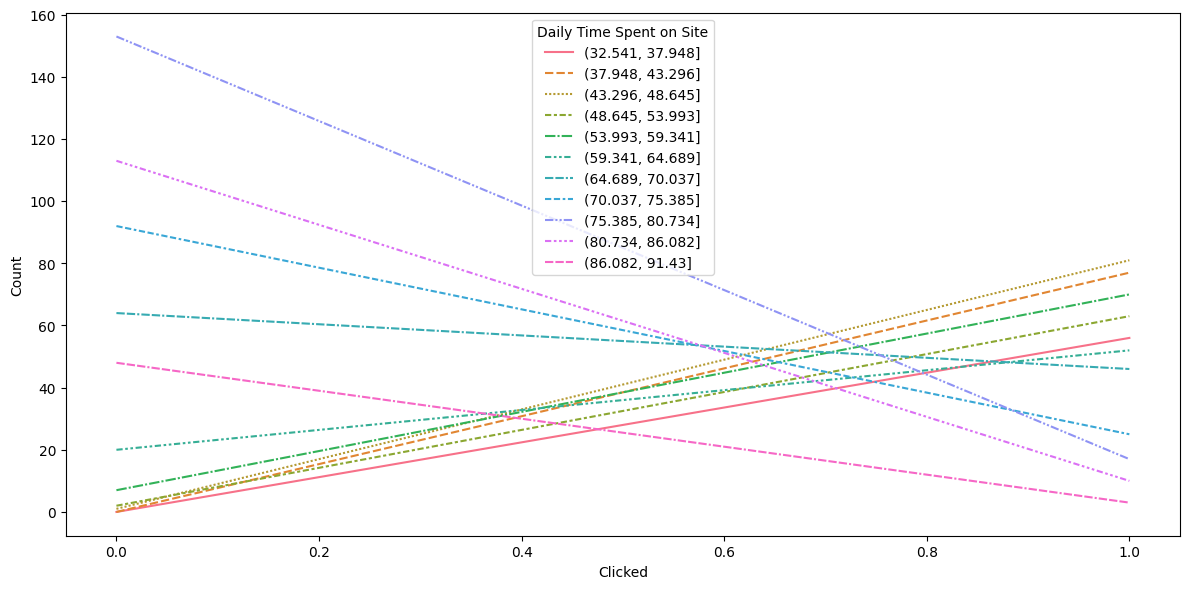

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dfDailyClickedCount)
plt.xlabel("Clicked")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### **Quan sát** 💬
- Dựa vào hệ số tương quan nhỏ hơn 0 (-0.748) và đồ thị, ta rút ra kết luận rằng thời gian người dùng sử dụng website càng lâu thì càng ít khả năng họ sẽ nhấn vào quảng cáo, cần có biện pháp cải thiện. 

## **Question 5** 🔔

❓  **Câu hỏi đề ra:** Việc sử dụng Internet hằng ngày có ảnh hưởng đến xu hướng nhấn vào quảng cáo của người dùng không?

✅  **Mục đích của việc trả lời câu hỏi** Kiểm tra xem những người dùng Internet hằng ngày có thường nhấn vào quảng cáo hay không, từ đó có thể đưa ra hướng phát triển nội dung, cách thức quảng cáo.

💡  **Cách để tìm ra câu trả lời**: Tính hệ số tương quan

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: Tính hệ số tương quan

In [20]:
df[['Daily Internet Usage','Clicked on Ad']].corr()

,Daily Internet Usage,Clicked on Ad
Daily Internet Usage,1.000000,-0.786539
Clicked on Ad,-0.786539,1.000000


**Bước 2**: Vẽ biểu đồ

In [21]:
dfInternetClicked=df[['Daily Internet Usage','Clicked on Ad']]
#gom nhóm
groups=dfInternetClicked.groupby(['Clicked on Ad', pd.cut(df["Daily Internet Usage"], bins=15)],observed=False)
dfInternetClickedCount=groups.size().unstack()
dfInternetClickedCount.reset_index(inplace=True,drop=True)
dfInternetClickedCount.rename(index={0:'Not Clicked',1:'Clicked'})

Daily Internet Usage,"(104.615, 115.792]","(115.792, 126.804]","(126.804, 137.816]","(137.816, 148.828]","(148.828, 159.84]","(159.84, 170.852]","(170.852, 181.864]","(181.864, 192.876]","(192.876, 203.888]","(203.888, 214.9]","(214.9, 225.912]","(225.912, 236.924]","(236.924, 247.936]","(247.936, 258.948]","(258.948, 269.96]"
Not Clicked,0,0,0,1,6,20,23,44,69,77,85,90,47,34,4
Clicked,64,92,86,62,65,48,28,12,19,8,5,3,1,6,1


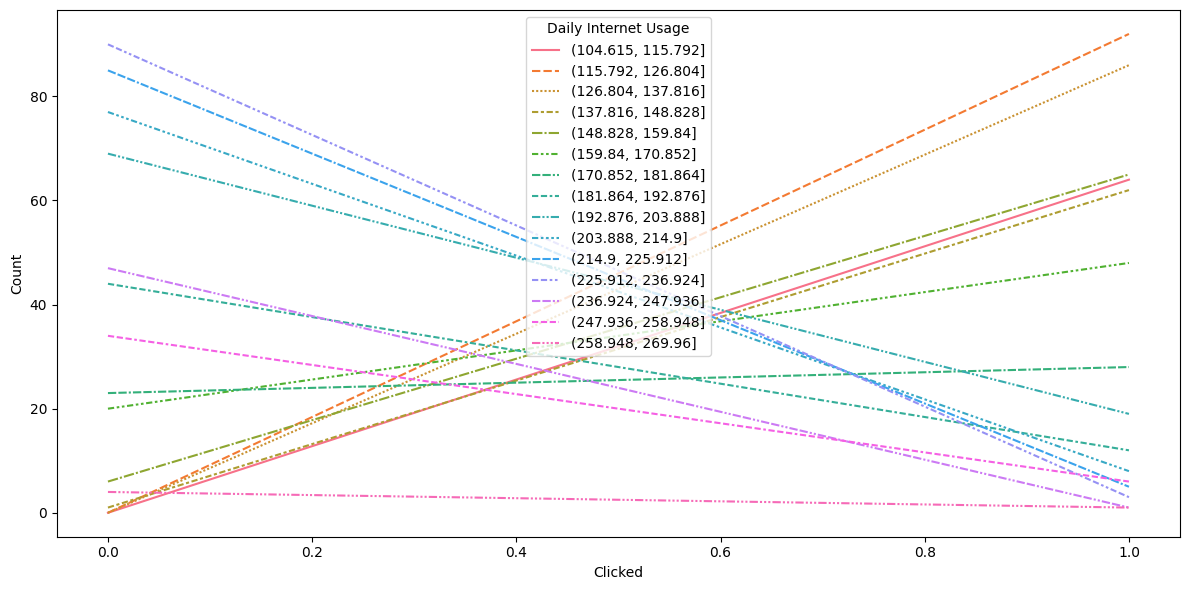

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dfInternetClickedCount)
plt.xlabel("Clicked")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### **Quan sát** 💬
- - Dựa vào hệ số tương quan nhỏ hơn 0 (-0.786) và đồ thị, ta rút ra kết luận rằng thời gian người dùng sử dụng internet càng lâu thì càng ít khả năng họ sẽ nhấn vào quảng cáo, cần có biện pháp cải thiện. 

## **Question 6** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
BƯỚC 6: Phân tích đa biến trong tập dữ liệu 🔥
</div>

## **Question 1** 🔔

❓  **Câu hỏi đề ra:** Phân tích 3 biến Age, Area Income và Clicked on Ad

✅  **Mục đích của việc trả lời câu hỏi** Phân tích sự liên quan giữa độ tuổi và thu nhập đối với khả năng nhấp vào quảng cáo của người dùng

💡  **Cách để tìm ra câu trả lời**: Sử dụng scatterplot và heatmap để thể hiện sự tương quan giữa 3 biến

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: Sử dụng scatterplot

<Axes: xlabel='Age', ylabel='Area Income'>

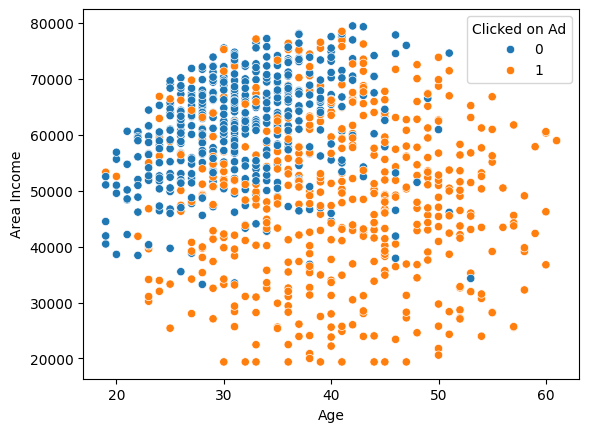

In [17]:
sns.scatterplot(data=df, x='Age', y='Area Income', hue='Clicked on Ad')

**Bước 2**: Sử dụng heatmap để mô tả sự tương quan của 3 biến dữ liệu

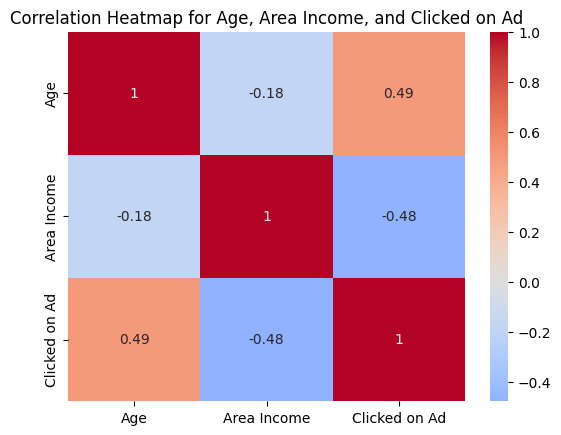

In [18]:
corr_matrix = df[['Age', 'Area Income', 'Clicked on Ad']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Age, Area Income, and Clicked on Ad')
plt.show()

### **Quan sát** 💬
- Dựa vào biểu đồ scatter, ta có thể thấy những người có thu nhập cao (>50000) thường sẽ không nhấp vào quảng cáo, đặc biệt là những người có thu nhập cao và nằm trong độ tuổi từ khoảng 20 cho tới 40.
- Ngoài ra, độ tuổi mà người dùng nhấp vào quảng cáo dao động từ 30 tới 50 tuổi. Mức thu nhập của người nhấp vào quảng cáo phân bố cũng khá đều, nghĩa là người nhấp vào quảng cáo sẽ phụ thuộc vào độ tuổi nhiều hơn.
- Quan sát biểu đồ heatmap thể hiện sự tương quan dữ liệu, cả Age và Area Income đều có sự tương quan ở mức tương đối đối với Clicked on Ad, Age lại nhỉnh hơn Area Income.

## **Question 2** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 3** 🔔

❓  **Câu hỏi đề ra:** Giới tính và thời gian sử dung Internet của người dùng có ảnh hưởng đến việc nhấn ào quảng cáo hay không?

✅  **Mục đích của việc trả lời câu hỏi** Xác định nhóm đối tượng cần tập trung phân tích, giúp diều chỉnh nội dung và hình thức quảng cáo cho phù hợp.

💡  **Cách để tìm ra câu trả lời**: Lập bảng tần suất và vẽ biểu đồ nhiệt.

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: Lập bảng tần suất

In [ ]:
dfMale=df.loc[df['Male'] == 1, ['Daily Internet Usage','Clicked on Ad']]
#gom nhóm
groups=dfMale.groupby(['Clicked on Ad', pd.cut(df["Daily Internet Usage"], bins=10)],observed=False)
dfMaleCount=groups.size().unstack()
dfMaleCount.columns.name='Daily Internet Usage for Male'
dfMaleCount.reset_index(inplace=True,drop=True)
dfMaleCount.rename(index={0:'Not Clicked',1:'Clicked'})

Daily Internet Usage for Male,"(104.615, 121.298]","(121.298, 137.816]","(137.816, 154.334]","(154.334, 170.852]","(170.852, 187.37]","(187.37, 203.888]","(203.888, 220.406]","(220.406, 236.924]","(236.924, 253.442]","(253.442, 269.96]"
Not Clicked,0,0,2,11,23,45,54,73,32,10
Clicked,47,67,47,32,17,10,5,3,2,1


In [ ]:
dfFemale=df.loc[df['Male'] == 0, ['Daily Internet Usage','Clicked on Ad']]
#gom nhóm
groups=dfFemale.groupby(['Clicked on Ad', pd.cut(df["Daily Internet Usage"], bins=10)],observed=False)
dfFeCount=groups.size().unstack()
dfFeCount.columns.name='Daily Internet Usage for Female'
dfFeCount.reset_index(inplace=True,drop=True)
dfFeCount.rename(index={0:'Not Clicked',1:'Clicked'})

Daily Internet Usage for Female,"(104.615, 121.298]","(121.298, 137.816]","(137.816, 154.334]","(154.334, 170.852]","(170.852, 187.37]","(187.37, 203.888]","(203.888, 220.406]","(220.406, 236.924]","(236.924, 253.442]","(253.442, 269.96]"
Not Clicked,0,0,1,13,19,49,60,65,35,8
Clicked,64,64,54,42,18,14,6,2,2,3


In [49]:
dfGender = pd.crosstab([df['Male'],df['Daily Internet Usage']], df['Clicked on Ad'],margins = True) 
print(dfGender) 

Clicked on Ad                0    1   All
Male Daily Internet Usage                
0    105.0                   0    1     1
     105.15                  0    1     1
     105.22                  0    1     1
     105.69                  0    1     1
     105.71                  0    1     1
...                        ...  ...   ...
1    258.06                  1    0     1
     261.52                  1    0     1
     267.01                  1    0     1
     269.96                  0    1     1
All                        500  500  1000

[984 rows x 3 columns]


**Bước 2**: Vẽ biểu đồ nhiệt

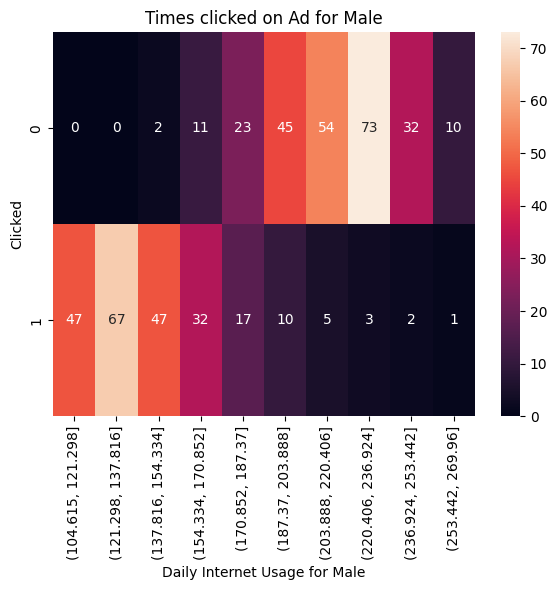

In [58]:
plt.figure(figsize=(6,6))
s= sns.heatmap(dfMaleCount,annot=True)
s.set(ylabel='Clicked')
plt.title("Times clicked on Ad for Male")
plt.tight_layout()
plt.show()

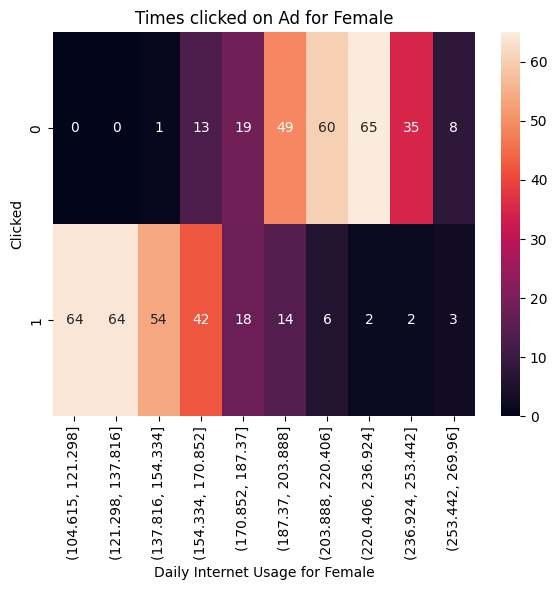

In [57]:
plt.figure(figsize=(6,6))
s= sns.heatmap(dfFeCount,annot=True)
s.set(ylabel='Clicked')
plt.title("Times clicked on Ad for Female")
plt.tight_layout()
plt.show()

### **Quan sát** 💬
- Cả 2 biểu đồ đều thể hiện xu hướng rằng nếu người dùng càng dùng nhiều thời gian trên website thì càng ít khả năng họ sẽ nhấn vào quảng cáo
- Từ đó kết luận nếu dùng thời gian người dùng sử dụng website để xác định việc có nhấn vào quảng cáo thì giới tình của người đó sẽ không ảnh hưởng đến kết quả.

## **Question 4** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...